Tasks

- Comments
- Reformatting

Text(0, 0.5, 'Cost')

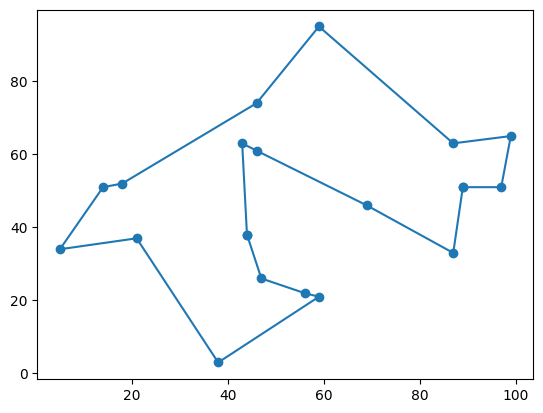

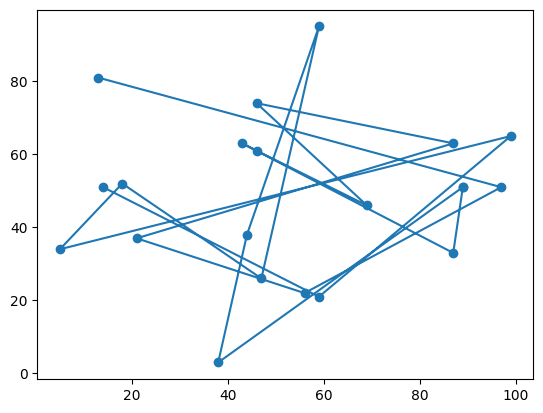

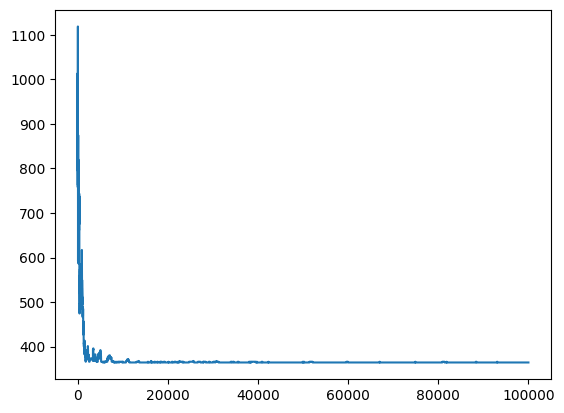

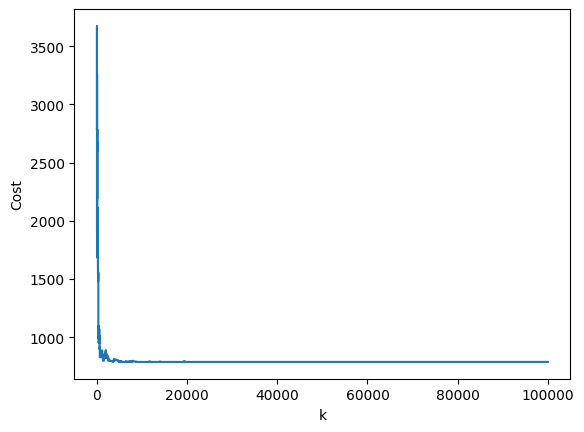

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun  9 10:39:36 2023

@author: filip
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scs
import random
import math
import os

#%%


#importing Travelling Salesman Matrix
df = pd.read_csv(os.path.join(os.getcwd(), '../filip', 'cost.csv'), header = None)
TSM = df.to_numpy()



#%% 
""" Question a """

#Cooling scheme
def cool(k):
    #return 1/np.sqrt(1+k)
    return 1/ np.log(k+1)
    #1 - np.log(k+1)

#cost of Question a
def costEuclid(route):
    return sum(abs(np.diff(route)))

def random_neighbor(state):
    a = np.array(state)
    r1,r2 = np.random.randint(0, 20, 2)
    a[r1],a[r2] = a[r2],a[r1]
    #a[0:-1] = np.random.randint(0, 20, 20)
    if a[0] != a[-1]:
        a[-1] = a[0]
    return a


def random_coordinates(X):
    C= np.random.randint(0,100+1,[len(X)-1,2]).tolist()
    C.insert(X[-1],C[X[-1]])
    return np.array(C)
    
#cost of Question a
def newCostEuclid(route,coord):
    dist = [ np.sqrt( (coord[route[N+1] ,0] - coord[route[N] ,0])**2 + (coord[route[N+1] ,1] - coord[route[N] ,1])**2)  for N in range(len(route)-1)]
    return np.sum(dist)


#initial random solution
X = np.array(range(len(TSM)))
random.shuffle(X) #randomize starting route

X = np.concatenate([X,[X[0]]])
init_X = X
XC = random_coordinates(X)
U = newCostEuclid(X,XC)


n = 100000#number of simulations



cost_tracker = np.zeros(n)

ks = 0.0001
for k in range(n):
    T = cool(ks)
    X_candidate = random_neighbor(X)
    
    
    U_candidate = newCostEuclid(X_candidate,XC)
    
    if U_candidate < U:
        X = X_candidate
        U = U_candidate
    elif np.exp(-(U_candidate-U)/T ) > random.random():
        #print(np.exp(-(U_candidate-U)/T ))
        X = X_candidate
        U = U_candidate
    cost_tracker[k] = U
    ks = ks+0.0001#+0.005
    #print(ks)

plt.figure()

plt.scatter(XC[X][:,0],XC[X][:,1])
plt.plot(XC[X][:,0],XC[X][:,1])

plt.figure()
plt.scatter(XC[:,0],XC[:,1])
plt.plot(XC[:,0],XC[:,1])

plt.figure()
plt.plot(cost_tracker)


#%% Question 2



def cost(route):
    c = 0
    for k in range(len(route)-1):
        c += TSM[route[k],route[k+1]]
    return c
#initial random solution
init = np.array(range(len(TSM)))
random.shuffle(init) #randomize starting route

init = np.concatenate([init,[init[0]]])
#print(init)
init_cost = cost(init)


n = 100000#number of simulations
X = init
U = cost(X)

cost_tracker = np.zeros(n)


ks = 0.0001
for k in range(n):
    T = cool(ks)
    X_candidate = random_neighbor(X)
    U_candidate = cost(X_candidate)
    
    if U_candidate < U:
        X = X_candidate
        U = U_candidate
    elif np.exp(-(U_candidate-U)/T ) > random.random():
        #print(np.exp(-(U_candidate-U)/T ))
        X = X_candidate
        U = U_candidate
    cost_tracker[k] = U
    ks = ks+0.0001#+0.005

plt.figure()
plt.plot(range(n),cost_tracker,marker=' ')
plt.xlabel('k')
plt.ylabel('Cost')





